# Inferential statistics II - Bootstrapping
Assignment completed by Carolyn Massa Feb. 6, 2020

## Introduction

This solution is performed to test the Null Hypothesis from our previous exercise that states that the hospital charges uninsured patients a much different rate as opposed to those that are insured.  We will review our data below of 10,000 claims to decide to reject or accept the Null Hypothesis. We will apply the Bootstrap method and use permutations as well to review the difference in Standard Deviations between insuranced and uninsured patient charges.

In [68]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
df = pd.read_csv('insurance2.csv')#medical charges with and without insurance claims

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

A: Here it is: array([6676.06177337, 8486.94648372])

In [4]:
charges = df['charges'].values #lets look at the charges then apply our bootstrapping method
charges[0:5]


array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

In [8]:
seed(47) #First let's review our confidence level by just looking at the charges and not if they are insured or not
n_reps = 10000
bs_means = []
for _ in range(n_reps):
    # Select samples of the same size from the original sample
    # We select with replacement
    # Calculate the mean of each sample
    bs_means.append(np.mean(np.random.choice(charges, size=len(charges))))
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_means, [2.5, 97.5])
print(f'Lower 95% CI: {conf_int[0]}')
print(f'Upper 95% CI: {conf_int[1]}')

Lower 95% CI: 12624.862119128531
Upper 95% CI: 13918.009299969919


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

NOTE: I am not getting 12724 though it may be due to the fact that there are two methods to perform a T test depending on how equal the variances are as mentioned below.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

A: H0 : there is no difference in standard deviations between insured and non-insured groups


HA : there is a difference in standard deviations between insured and non-insured groups



In [13]:
# simulated mean of mean
bts_mean = np.mean(bs_means)

In [12]:
# simulated mean VS true mean
(df['charges'].mean(), bts_mean)

(13270.422265141257, 13268.292567069491)

In [14]:
insured = df[df['insuranceclaim'] == 1]['charges'].values
un_insured = df[df['insuranceclaim'] == 0]['charges'].values
print(insured [0:5])

[16884.924   1725.5523  3866.8552  8240.5896  2721.3208]


In [15]:
def diff_of_stdev(arr1, arr2):
    """
    This loop will accepts two standard deviations as floats
    Returns the difference between standard deviations
    """
    return np.std(arr1, ddof=1) - np.std(arr2, ddof=1)

def perm_samples(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = perm_samples(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [16]:
seed(47)
# Draw 10,000 permutation replicates: perm_replicates
size=10000
perm_replicates = draw_perm_reps(insured, un_insured, diff_of_stdev, size=size)
perm_replicates[0:5]

array([-609.516403  ,  -22.1703422 ,  108.70568739,  457.66825466,
       -188.33739134])

In [17]:
print(np.mean(perm_replicates))
print(np.std(perm_replicates))

-0.6062271636070733
627.9320507440277


In [18]:
conf_int = np.percentile(perm_replicates, [2.5, 97.5])
print(f'Lower 95% CI: {conf_int[0]}')
print(f'Upper 95% CI: {conf_int[1]}')

Lower 95% CI: -1225.8896621419356
Upper 95% CI: 1245.4843695294596


In [19]:
# Compute difference of mean impact force from experiment: observed_diff_means
obs_diff_stdevs = diff_of_stdev(insured, un_insured)
obs_diff_stdevs

7599.418291990396

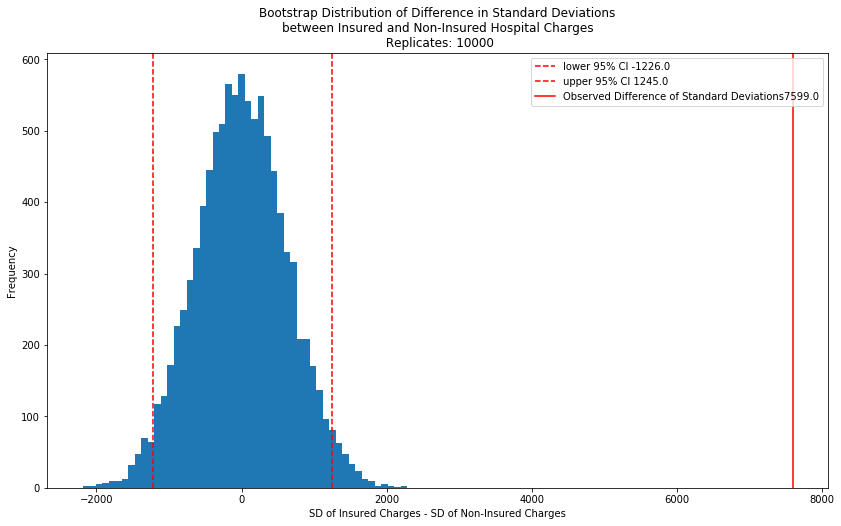

In [30]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(perm_replicates, bins = 50)
ax.axvline(conf_int[0], color='red', linestyle='--', label= f"lower 95% CI {round(conf_int[0],0)}")
ax.axvline(conf_int[1], color='red', linestyle='--', label= f"upper 95% CI {round(conf_int[1],0)}")
ax.axvline(obs_diff_stdevs, color='red', linestyle='-', label= f"Observed Difference of Standard Deviations\
{round(obs_diff_stdevs,0)}")
ax.set_ylabel('Frequency')
ax.set_xlabel('SD of Insured Charges - SD of Non-Insured Charges')
ax.set_title(f'Bootstrap Distribution of Difference in Standard Deviations\n\
between Insured and Non-Insured Hospital Charges\n Replicates: {n_reps}')
plt.legend()
plt.show();

By reviewing the histogram above we see that the observed value is much higher than the bootstrapped upper value so we will reject the null hypothesis.


In [51]:
yi = df[df['insuranceclaim'] == 1]['charges'].values
ni = df[df['insuranceclaim'] == 0]['charges'].values

yi

array([16884.924   ,  1725.5523  ,  3866.8552  ,  8240.5896  ,
        2721.3208  , 27808.7251  ,  1826.843   , 11090.7178  ,
       39611.7577  , 10797.3362  , 10602.385   , 36837.467   ,
       13228.84695 ,  4149.736   ,  1137.011   , 37701.8768  ,
       14001.1338  ,  2775.19215 , 38711.      , 35585.576   ,
        2198.18985 , 13770.0979  , 51194.55914 , 39774.2763  ,
       48173.361   ,  3046.062   , 20630.28351 ,  3556.9223  ,
       38709.176   ,  2211.13075 , 23568.272   , 37742.5757  ,
       47496.49445 , 34303.1672  , 23244.7902  ,  8606.2174  ,
       14711.7438  ,  1743.214   , 14235.072   ,  5920.1041  ,
       16577.7795  , 11741.726   , 11946.6259  ,  7726.854   ,
       11356.6609  ,  1532.4697  ,  2755.02095 ,  6571.02435 ,
        7935.29115 , 37165.1638  , 39836.519   , 21098.55405 ,
       43578.9394  , 11073.176   ,  8026.6666  , 11082.5772  ,
        2026.9741  , 30184.9367  , 47291.055   , 10226.2842  ,
       22412.6485  , 15820.699   ,  6186.127   , 21344.

In [26]:
# We draw a sample from the df listed population with insurance and without ins:
sampleyi = np.random.choice(yi, size=10000)
sampleni = np.random.choice(ni, size=10000)

In [32]:
# bootstrap for st.dev:
boot_std = []
for _ in range(10000):
    bootsample = np.random.choice(sampleyi,size=10000, replace=True)
    boot_std.append(bootsample)

In [44]:
def diff_of_stdevs(arr1, arr2):
    """
    Accepts two standard deviations as floats
    Returns the difference between standard deviations
    """
    return np.std(arr1, ddof=1) - np.std(arr2, ddof=1)

seed(47)
n_reps = 10000
bs_diff_of_stdevs = []
for _ in range(n_reps):
    # Select samples of the same size from the original sample
    # We select with replacement
    # Calculate the mean of each sample
    bs_ins = np.random.choice(insured, size=len(insured))
    bs_un_ins = np.random.choice(un_insured, size=len(un_insured))
    bs_diff_of_stdevs.append(diff_of_stdevs(bs_ins, bs_un_ins))
    # Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_of_stdevs, [2.5, 97.5])
print(f'Lower 95% CI: {conf_int[0]}')
print(f'Upper 95% CI: {conf_int[1]}')


Lower 95% CI: 6683.99830926605
Upper 95% CI: 8506.649041575301


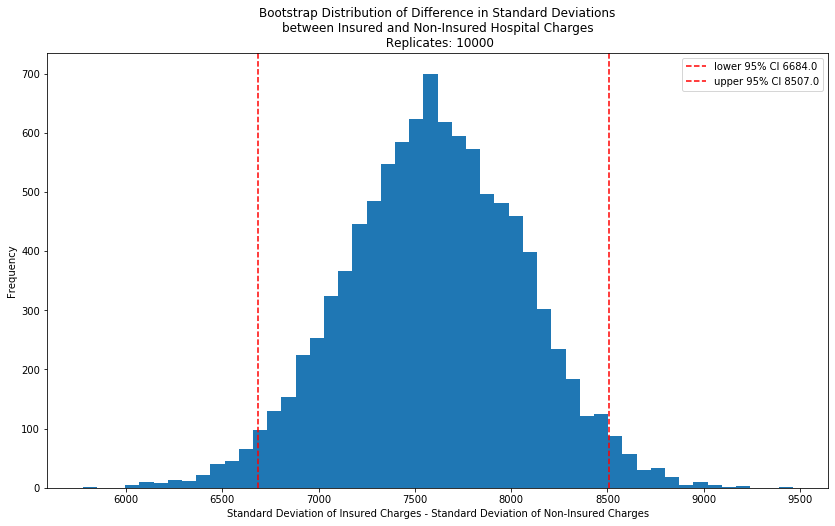

In [45]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(bs_diff_of_stdevs, bins = 50)
ax.axvline(conf_int[0], color='red', linestyle='--', label= f"lower 95% CI {round(conf_int[0],0)}")
ax.axvline(conf_int[1], color='red', linestyle='--', label= f"upper 95% CI {round(conf_int[1],0)}")
ax.set_ylabel('Frequency')
ax.set_xlabel('SD of Insured Charges - SD of Non-Insured Charges')
ax.set_title(f'Bootstrap Distribution of Difference in Standard Deviations\n\
between Insured and Un-Insured Hospital Charges\n Replicates: {n_reps}')
plt.legend()
plt.show();

In [56]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [62]:
observed_diff_means = np.mean(yi) - np.mean(ni)
observed_diff

7602.506384231372

In [65]:
p = np.sum(bs_replicates >= observed_diff_means) / len(bs_replicates)
print(f'p-value = {p:.6f}')

p-value = 0.000000


In [64]:
#we compute the mean charge of our grouped data

mean_charge = np.mean(np.concatenate((yi, ni)))

# we look for the common mean to improve accuracy by adding the mean charge with both insured and uninsured groups
yi_shifted = yi - np.mean(yi) + mean_charge
ni_shifted = ni - np.mean(ni) + mean_charge

# Generate bootstrap replicates
bs_reps_charges_ins = draw_bs_reps(yi_shifted,
                               np.mean, size=10000)
bs_reps_charges_noins = draw_bs_reps(ni_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_charges_ins - bs_reps_charges_noins

bs_replicates[0:5]

array([   -6.33566566, -1365.21774331,  -587.01668792,   110.66629001,
        -389.76906196])

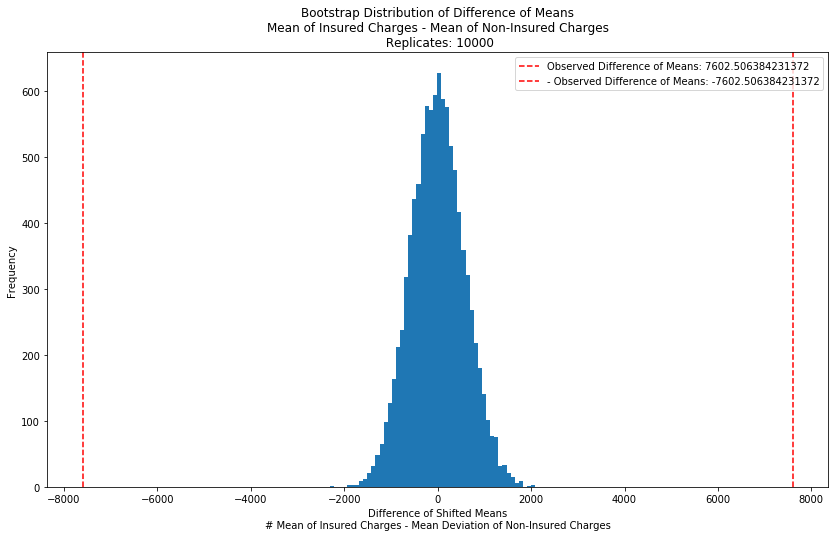

In [66]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(bs_replicates, bins = 50)
ax.axvline(observed_diff_means, color='red', linestyle='--', label= f"Observed Difference of Means: \
{observed_diff_means}")
ax.axvline(-observed_diff_means, color='red', linestyle='--', label= f"- Observed Difference of Means: \
{-observed_diff_means}")
#ax.axvline(conf_int[1], color='red', linestyle='--', label= f"upper 95% CI {round(conf_int[1],0)}")
ax.set_ylabel('Frequency')
ax.set_xlabel('Difference of Shifted Means\n\
# Mean of Insured Charges - Mean Deviation of Non-Insured Charges')
ax.set_title(f'Bootstrap Distribution of Difference of Means\n\
Mean of Insured Charges - Mean of Non-Insured Charges\n Replicates: {n_reps}')
plt.legend()
plt.show();

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

A:The actual means of insured and non-insured medical cases have no difference but means are different as the p_value = 0.0 which indicated indicate if the Null Hypothesis is valid, there is extremely low prabablity to get a difference in the observed difference in the "mean" values of insured vs non-insured medical cases. We shall reject this Null Hypothesis and go to an Alternative Hypothesis.

Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)
A: We are parsing  various differences; so if the arrays are reversed, we could be looking for a negative difference

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

A: No I would not as it would consume large amounts of computing resources and the observed value is currently 2 fields away from the end of the distribution.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

A:  I would use a z test since we are comparing a population mean to a sample mean 

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

A: I would suggest as a Null Hypothesis that the click through rates make no difference in the client intention to sign up The Alternative Hypothesis suggests that the # of click through rates have different outcomes
I would do a one-sample test using two groups A and B and set the mean of A to the mean of B. Null H: mean of A is acutally the mean of B. Alternative Hyp: the new algorithm is having an effect. Then I'd want to compute the fraction of replicates that are <= to the mean of A and use an HA alogorithm

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.